In [1]:
import os
os.chdir('./Justcode/deeplearning-study/1-2/')
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset


In [2]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

In [3]:
print(f'X_train.shape = {X_train.shape}\nY_train.shape = {Y_train.shape}\nX_test.shape = {X_test.shape}\nY_test.shape = {Y_test.shape}')

X_train.shape = (209, 64, 64, 3)
Y_train.shape = (1, 209)
X_test.shape = (50, 64, 64, 3)
Y_test.shape = (1, 50)


In [4]:
X_train = X_train.reshape((X_train.shape[0], -1)).T / 255
X_test = X_test.reshape((X_test.shape[0], -1)).T / 255
print(X_train.shape, X_test.shape)

(12288, 209) (12288, 50)


In [5]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

sigmoid(0)

0.5

In [6]:
class Model(object):

    def __init__(self, alpha=0.004, loops=2000, print_cost=True):
        self.alpha = alpha
        self.loops = loops
        self.print_cost = print_cost
        self.W = None
        self.b = None
        self.cost_per50 = []

    def get_W(self):
        return self.W

    def get_b(self):
        return self.b

    def get_cost_per50(self):
        return self.cost_per50

    def init_para(self, dim):
        self.W = np.random.randn(1, dim) * 10e-4
        self.b = 0
        return self.W, self.b

    def prop(self, X, Y, W, b):
        m = Y.shape[1]
        A = sigmoid(np.dot(W, X) + b)
        dW = np.dot(A-Y, X.T) / m
        db = np.sum(A-Y) / m
        self.W -= self.alpha * dW
        self.b -= self.alpha *db
        L = -Y * np.log(A) - (1 - Y) * np.log(1 - A)
        J = np.sum(L) / m
        return self.W, self.b, J

    def fit(self, X_train, Y_train):
        self.W, self.b = self.init_para(X_train.shape[0])
        # print('W[0, :5]:', self.W[0, :5])
        for i in range(self.loops):
            self.W, self.b, J = self.prop(X_train, Y_train, self.W, self.b)
            j = i + 1
            if j%50 == 0: #or j == 1:
                # print('W[0, :5]:', self.W[0, :5])
                self.cost_per50.append(J)
                if self.print_cost:
                    print(f'第{j}次迭代损失值: {J}')
        return self

    def predict(self, X):
        Y_predict = sigmoid(np.dot(self.W, X) + self.b)
        return Y_predict

    def get_acc(self, X, Y):
        Y_predict = self.predict(X) > 0.5
        acc = np.sum(Y_predict == Y) / Y.shape[1]
        return acc


In [7]:
model_list = []
for alpha in [0.005, 0.001, 0.0005]:
    print(f'\n------Start with alpha = {alpha}------\n')
    model = Model(alpha=alpha)
    model.fit(X_train, Y_train)
    model_list.append(model)
    print(f'alpha={alpha}, 训练集准确度：', model.get_acc(X_train, Y_train))
    print(f'alpha={alpha}, 测试集准确度：', model.get_acc(X_test, Y_test))


------Start with alpha = 0.005------

第50次迭代损失值: 0.7556289116476682
第100次迭代损失值: 0.6439562667321281
第150次迭代损失值: 0.5562674591674799
第200次迭代损失值: 0.48422981041176705
第250次迭代损失值: 0.42445522020121207
第300次迭代损失值: 0.37733387894676496
第350次迭代损失值: 0.34851199727816756
第400次迭代损失值: 0.3314894677235674
第450次迭代损失值: 0.31668546415441323
第500次迭代损失值: 0.3032858276999008
第550次迭代损失值: 0.2910749646340207
第600次迭代损失值: 0.2798836331842497
第650次迭代损失值: 0.2695758522929612
第700次迭代损失值: 0.26004063382907455
第750次迭代损失值: 0.25118620001321934
第800次迭代损失值: 0.24293580219149008
第850次迭代损失值: 0.2352246249370483
第900次迭代损失值: 0.22799744996789553
第950次迭代损失值: 0.2212068649566602
第1000次迭代损失值: 0.2148118708285923
第1050次迭代损失值: 0.2087767854038202
第1100次迭代损失值: 0.20307037069664316
第1150次迭代损失值: 0.19766513125569737
第1200次迭代损失值: 0.1925367448762232
第1250次迭代损失值: 0.1876635968746486
第1300次迭代损失值: 0.18302639619167807
第1350次迭代损失值: 0.17860785673927182
第1400次迭代损失值: 0.17439243120184061
第1450次迭代损失值: 0.170366087331884
第1500次迭代损失值: 0.16651611891381143
第1550次迭

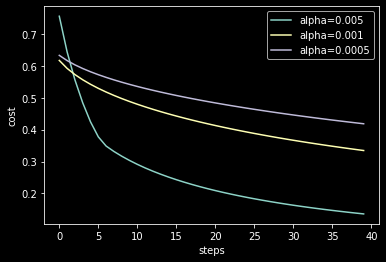

In [8]:
for model in model_list:
    cost = model.get_cost_per50()
    plt.plot(cost, label=f'alpha={model.alpha}')
plt.ylabel('cost')
plt.xlabel('steps')
plt.legend()
plt.show()